In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

        # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Medical-Equipments-Cost-Prediction-Challenge/sample_submission.csv
/kaggle/input/Medical-Equipments-Cost-Prediction-Challenge/train.csv
/kaggle/input/Medical-Equipments-Cost-Prediction-Challenge/test.csv


In [2]:
#Reading all training,testing,and sample submission datasets and displaying first few rows of training set
df1=pd.read_csv("/kaggle/input/Medical-Equipments-Cost-Prediction-Challenge/train.csv")
df2=pd.read_csv("/kaggle/input/Medical-Equipments-Cost-Prediction-Challenge/test.csv")
df3=pd.read_csv("/kaggle/input/Medical-Equipments-Cost-Prediction-Challenge/sample_submission.csv")
df1.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,3.62,17.13,No,No,No,Roadways,No,Working Class,No,10/20/17,10/20/17,APO AA 33776,179.50
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9703.37,35.42,No,Yes,Yes,Roadways,No,Working Class,No,02/22/16,02/24/16,"South Kevin, VT 84493",627732.45
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,40.21,18.54,No,No,No,Roadways,No,Working Class,No,01/11/18,01/10/18,"Kevinshire, NE 31279",1565.92
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,4.55,17.48,No,No,No,Roadways,No,Working Class,No,08/06/16,08/06/16,DPO AP 61572,257.71
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,2726.80,30.23,Yes,No,No,Roadways,No,Working Class,NaN,12/15/16,12/17/16,"Joshuamouth, AK 01550",8553.52


In [3]:
df1.shape #No. of rows and columns of training set

(5000, 20)

In [4]:
df2.shape #No. of rows and columns of test set

(500, 19)

In [5]:
df2.isnull().sum() #No. of null values in test set

Hospital_Id               0
Supplier_Name             0
Supplier_Reliability     55
Equipment_Height         23
Equipment_Width          56
Equipment_Weight         52
Equipment_Type           56
Equipment_Value           0
Base_Transport_Fee        0
CrossBorder_Shipping      0
Urgent_Shipping           0
Installation_Service      0
Transport_Method        123
Fragile_Equipment         0
Hospital_Info             0
Rural_Hospital           64
Order_Placed_Date         0
Delivery_Date             0
Hospital_Location         0
dtype: int64

In [6]:
df1.drop_duplicates(inplace=True)#Dropping duplicates 
df1.isnull().sum()  #No. of null values in training set

Hospital_Id                0
Supplier_Name              0
Supplier_Reliability     587
Equipment_Height         283
Equipment_Width          443
Equipment_Weight         460
Equipment_Type           599
Equipment_Value            0
Base_Transport_Fee         0
CrossBorder_Shipping       0
Urgent_Shipping            0
Installation_Service       0
Transport_Method        1071
Fragile_Equipment          0
Hospital_Info              0
Rural_Hospital           586
Order_Placed_Date          0
Delivery_Date              0
Hospital_Location          0
Transport_Cost             0
dtype: int64

In [7]:
nullity_value_percentages_df1=(df1.isnull().sum()/df1.shape[0])*100 #Null value percentages
nullity_value_percentages_df1


Hospital_Id              0.00
Supplier_Name            0.00
Supplier_Reliability    11.74
Equipment_Height         5.66
Equipment_Width          8.86
Equipment_Weight         9.20
Equipment_Type          11.98
Equipment_Value          0.00
Base_Transport_Fee       0.00
CrossBorder_Shipping     0.00
Urgent_Shipping          0.00
Installation_Service     0.00
Transport_Method        21.42
Fragile_Equipment        0.00
Hospital_Info            0.00
Rural_Hospital          11.72
Order_Placed_Date        0.00
Delivery_Date            0.00
Hospital_Location        0.00
Transport_Cost           0.00
dtype: float64

In [8]:
nullity_value_percentages_df2=(df2.isnull().sum()/df2.shape[0])*100
nullity_value_percentages_df2

Hospital_Id              0.0
Supplier_Name            0.0
Supplier_Reliability    11.0
Equipment_Height         4.6
Equipment_Width         11.2
Equipment_Weight        10.4
Equipment_Type          11.2
Equipment_Value          0.0
Base_Transport_Fee       0.0
CrossBorder_Shipping     0.0
Urgent_Shipping          0.0
Installation_Service     0.0
Transport_Method        24.6
Fragile_Equipment        0.0
Hospital_Info            0.0
Rural_Hospital          12.8
Order_Placed_Date        0.0
Delivery_Date            0.0
Hospital_Location        0.0
dtype: float64

In [9]:
columns_with_null_values = nullity_value_percentages_df1[nullity_value_percentages_df1>0]
columns_with_null_values

Supplier_Reliability    11.74
Equipment_Height         5.66
Equipment_Width          8.86
Equipment_Weight         9.20
Equipment_Type          11.98
Transport_Method        21.42
Rural_Hospital          11.72
dtype: float64

In [10]:
column_with_null_values_desc=columns_with_null_values.sort_values(ascending=False)
column_with_null_values_desc

Transport_Method        21.42
Equipment_Type          11.98
Supplier_Reliability    11.74
Rural_Hospital          11.72
Equipment_Weight         9.20
Equipment_Width          8.86
Equipment_Height         5.66
dtype: float64

In [11]:
cat_cols_encoded=["Equipment_Type","Transport_Method","Rural_Hospital","CrossBorder_Shipping","Urgent_Shipping","Installation_Service","Fragile_Equipment","Hospital_Info","Supplier_Name","Hospital_Location","Order_Placed_Date","Delivery_Date"]
#Categorical columns which need to be encoded

In [12]:
for col in cat_cols_encoded[0:3]: #Fill categorical rows with missing values with mode (most commonly occuring value of the feature)
    df1[col]=df1[col].fillna(df1[col].mode()[0])
    df2[col]=df2[col].fillna(df1[col].mode()[0])

In [13]:
nullity_value_percentages_df1=(df1.isnull().sum()/df1.shape[0])*100
nullity_value_percentages_df1

Hospital_Id              0.00
Supplier_Name            0.00
Supplier_Reliability    11.74
Equipment_Height         5.66
Equipment_Width          8.86
Equipment_Weight         9.20
Equipment_Type           0.00
Equipment_Value          0.00
Base_Transport_Fee       0.00
CrossBorder_Shipping     0.00
Urgent_Shipping          0.00
Installation_Service     0.00
Transport_Method         0.00
Fragile_Equipment        0.00
Hospital_Info            0.00
Rural_Hospital           0.00
Order_Placed_Date        0.00
Delivery_Date            0.00
Hospital_Location        0.00
Transport_Cost           0.00
dtype: float64

In [14]:
columns_with_null_values = nullity_value_percentages_df1[nullity_value_percentages_df1>0]
columns_with_null_values

Supplier_Reliability    11.74
Equipment_Height         5.66
Equipment_Width          8.86
Equipment_Weight         9.20
dtype: float64

In [15]:
nullity_value_percentages_df2=(df2.isnull().sum()/df2.shape[0])*100
nullity_value_percentages_df2

Hospital_Id              0.0
Supplier_Name            0.0
Supplier_Reliability    11.0
Equipment_Height         4.6
Equipment_Width         11.2
Equipment_Weight        10.4
Equipment_Type           0.0
Equipment_Value          0.0
Base_Transport_Fee       0.0
CrossBorder_Shipping     0.0
Urgent_Shipping          0.0
Installation_Service     0.0
Transport_Method         0.0
Fragile_Equipment        0.0
Hospital_Info            0.0
Rural_Hospital           0.0
Order_Placed_Date        0.0
Delivery_Date            0.0
Hospital_Location        0.0
dtype: float64

In [16]:
columns_with_null_values = nullity_value_percentages_df2[nullity_value_percentages_df2>0]
columns_with_null_values

Supplier_Reliability    11.0
Equipment_Height         4.6
Equipment_Width         11.2
Equipment_Weight        10.4
dtype: float64

In [17]:
col=columns_with_null_values[columns_with_null_values>0].index
col    

Index(['Supplier_Reliability', 'Equipment_Height', 'Equipment_Width',
       'Equipment_Weight'],
      dtype='object')

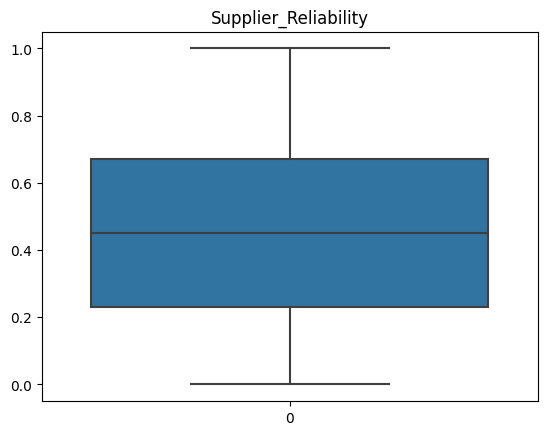

<Figure size 2000x1000 with 0 Axes>

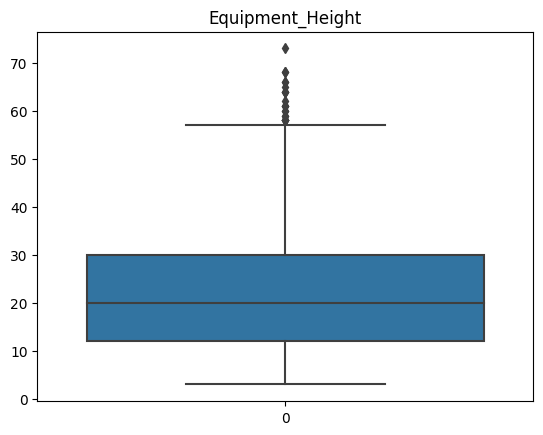

<Figure size 2000x1000 with 0 Axes>

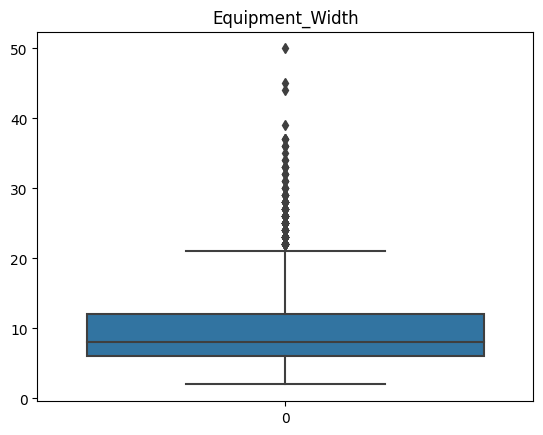

<Figure size 2000x1000 with 0 Axes>

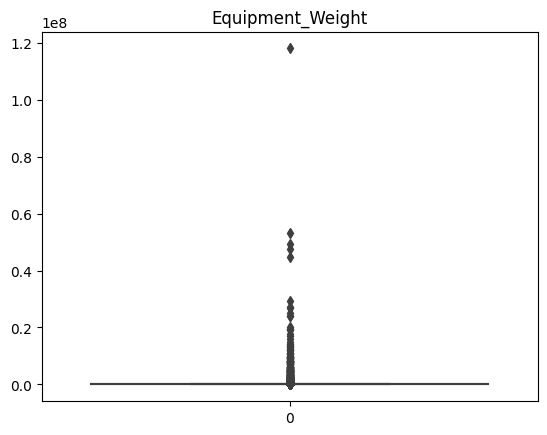

<Figure size 2000x1000 with 0 Axes>

In [18]:
for i in col: # Plot boxplots of numeric columns in training set with missing values to check presence of outliers and the kind of imputation to be used
    sns.boxplot(df1[i])
    plt.title(i)
    plt.figure(figsize=(20, 10))
    plt.show()

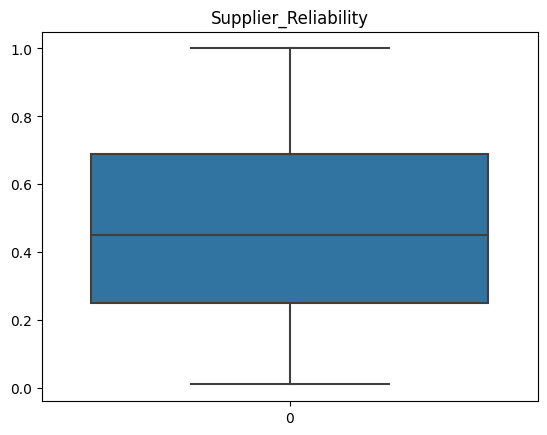

<Figure size 2000x1000 with 0 Axes>

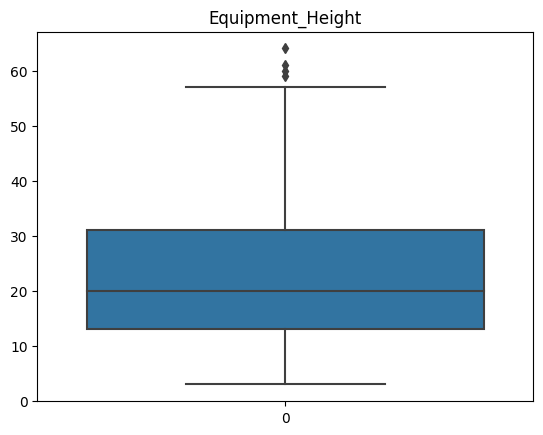

<Figure size 2000x1000 with 0 Axes>

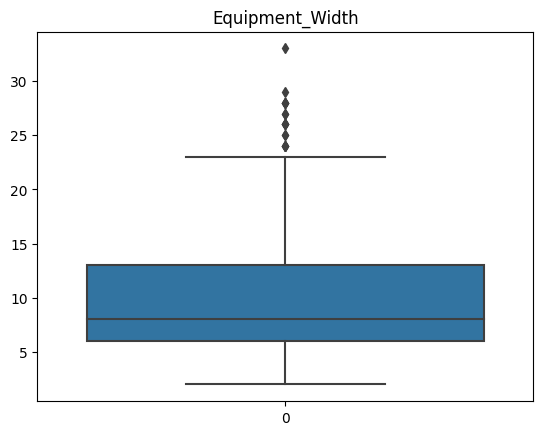

<Figure size 2000x1000 with 0 Axes>

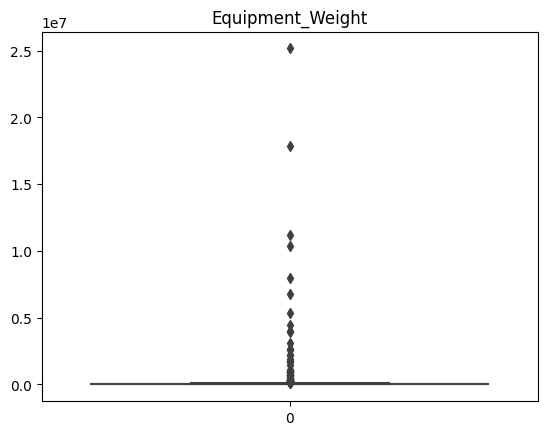

<Figure size 2000x1000 with 0 Axes>

In [19]:
for i in col:# Plot boxplots of numeric columns in test set with missing values to check presence of outliers and the kind of imputation to be used
    sns.boxplot(df2[i])
    plt.title(i)
    plt.figure(figsize=(20, 10))
    plt.show()

In [20]:
class outlierremoval: # Outlier removal class
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5
  
	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker

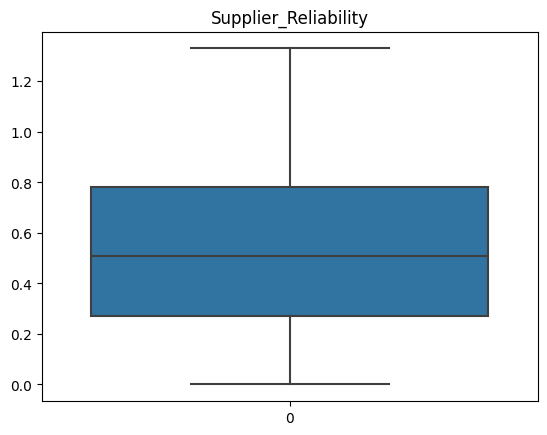

<Figure size 1000x1000 with 0 Axes>

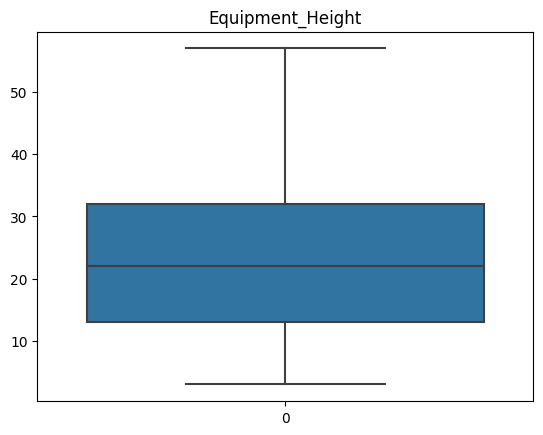

<Figure size 1000x1000 with 0 Axes>

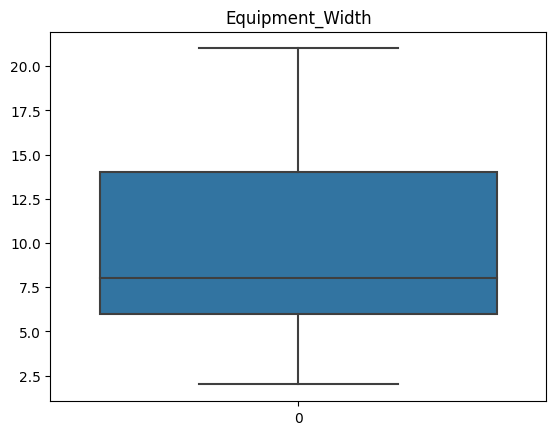

<Figure size 1000x1000 with 0 Axes>

In [21]:
for i in col[:-1]: #Outlier removal from first 3 features present in col for training set
    remover=outlierremoval(df1[i])
    df1[i]=df1[i].apply(remover.remove)
    sns.boxplot(df1[i])
    plt.title(i)
    plt.figure(figsize=(10, 10))
    plt.show()
    

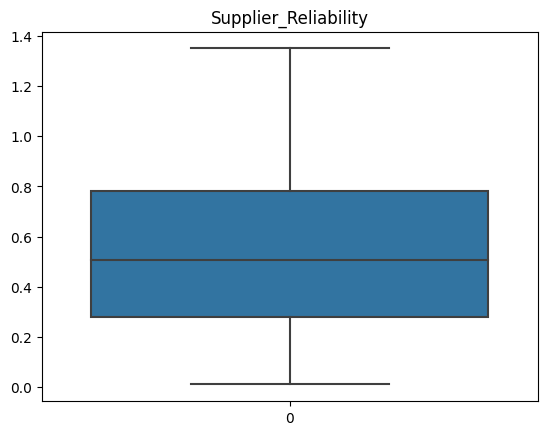

<Figure size 1000x1000 with 0 Axes>

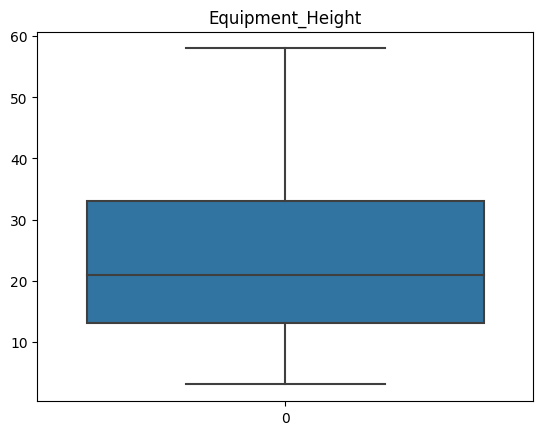

<Figure size 1000x1000 with 0 Axes>

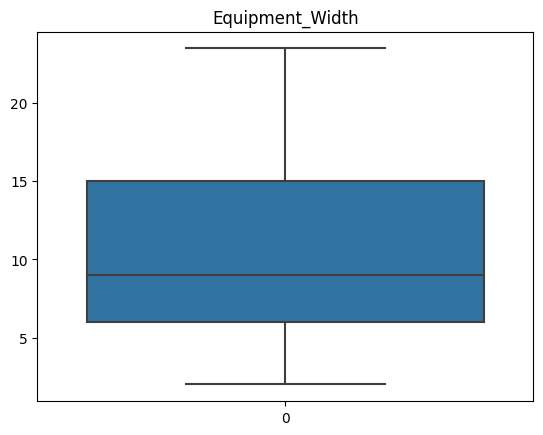

<Figure size 1000x1000 with 0 Axes>

In [22]:
for i in col[:-1]:#Outlier removal from first 3 features present in col for testing set
    remover=outlierremoval(df2[i])
    df2[i]=df2[i].apply(remover.remove)
    sns.boxplot(df2[i])
    plt.title(i)
    plt.figure(figsize=(10, 10))
    plt.show()

In [23]:
for i in col: # Median imputation after outlier removal
    df1[i]=df1[i].fillna(value=df1[i].median())
    df2[i]=df2[i].fillna(value=df2[i].median())
    

In [24]:
le = LabelEncoder()  
for col in cat_cols_encoded:
    combined = pd.concat([df1[col], df2[col]], axis=0).astype(str)
    le.fit(combined)
    df1[col] = le.transform(df1[col].astype(str))
    df2[col] = le.transform(df2[col].astype(str))

In [25]:
for df in [df1,df2]:
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].clip(lower=0)

In [26]:
df1.drop(columns=["Order_Placed_Date", "Delivery_Date"], inplace=True)
df2.drop(columns=["Order_Placed_Date", "Delivery_Date"], inplace=True)

In [27]:
col2=["Supplier_Reliability","Equipment_Value","Equipment_Height","Equipment_Width","Equipment_Weight","Base_Transport_Fee"]
col3=col2+["Equipment_Type","Transport_Method","Rural_Hospital","CrossBorder_Shipping","Urgent_Shipping","Installation_Service","Fragile_Equipment"]
col4=["Equipment_Height","Equipment_Width","Equipment_Weight","Equipment_Value","Base_Transport_Fee"]

In [28]:
for i in col3:
    print(f"The correlation between {i} and Transport_Cost is {df1[i].corr(df1['Transport_Cost'])}")


The correlation between Supplier_Reliability and Transport_Cost is 0.044243035150154396
The correlation between Equipment_Value and Transport_Cost is 0.43879203798061767
The correlation between Equipment_Height and Transport_Cost is 0.08580645638089003
The correlation between Equipment_Width and Transport_Cost is 0.09994290375515014
The correlation between Equipment_Weight and Transport_Cost is 0.39038653004767937
The correlation between Base_Transport_Fee and Transport_Cost is 0.05294935875691404
The correlation between Equipment_Type and Transport_Cost is 0.036931416282341575
The correlation between Transport_Method and Transport_Cost is -0.02708100787794911
The correlation between Rural_Hospital and Transport_Cost is -0.009778665677058547
The correlation between CrossBorder_Shipping and Transport_Cost is 0.006255106767306672
The correlation between Urgent_Shipping and Transport_Cost is 0.03732944445079658
The correlation between Installation_Service and Transport_Cost is 0.013753092

In [29]:
df1.isnull().sum()

Hospital_Id             0
Supplier_Name           0
Supplier_Reliability    0
Equipment_Height        0
Equipment_Width         0
Equipment_Weight        0
Equipment_Type          0
Equipment_Value         0
Base_Transport_Fee      0
CrossBorder_Shipping    0
Urgent_Shipping         0
Installation_Service    0
Transport_Method        0
Fragile_Equipment       0
Hospital_Info           0
Rural_Hospital          0
Hospital_Location       0
Transport_Cost          0
dtype: int64

In [30]:
df2.isnull().sum()

Hospital_Id             0
Supplier_Name           0
Supplier_Reliability    0
Equipment_Height        0
Equipment_Width         0
Equipment_Weight        0
Equipment_Type          0
Equipment_Value         0
Base_Transport_Fee      0
CrossBorder_Shipping    0
Urgent_Shipping         0
Installation_Service    0
Transport_Method        0
Fragile_Equipment       0
Hospital_Info           0
Rural_Hospital          0
Hospital_Location       0
dtype: int64

In [31]:
#Train test split on Training csv file ,fitting with features present in col3 list
X=df1[col3]
y=df1["Transport_Cost"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
df4=df2[col3]


In [32]:
regressor=LinearRegression()

regressor.fit(X_train,y_train)
reg_pred_val=regressor.predict(X_val)
reg_pred_train=regressor.predict(X_train)
reg_pred_rmse_val=np.sqrt(mean_squared_error(y_val, reg_pred_val))
reg_pred_rmse_train=np.sqrt(mean_squared_error(y_train, reg_pred_train))
print(f"Validation and Train RMSES(regression): {reg_pred_rmse_val},{reg_pred_rmse_train}")


Validation and Train RMSES(regression): 43813.292562184586,254903.78874702856


In [33]:
print("Train R²:", r2_score(y_train, reg_pred_train))
print("Test R² :", r2_score(y_val, reg_pred_val))


Train R²: 0.19552795322778638
Test R² : 0.11049986169552828


In [34]:
regressor.fit(X,y) 

test_preds1=regressor.predict(df4)


In [35]:
alphas = [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10**4,10**5,10**6,10**7,10**8,100080000]#To find best regularixation parameter for ridge regression

ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
a=ridge_cv.alpha_
print("Best alpha for Ridge for training set split from training data:", ridge_cv.alpha_)


Best alpha for Ridge for training set split from training data: 100080000.0


In [36]:
ridgeReg=Ridge(alpha=a)
ridgeReg.fit(X_train,y_train)
ridge_pred_val=ridgeReg.predict(X_val)
ridge_pred_train=ridgeReg.predict(X_train)
rmse_ridge_val=np.sqrt(mean_squared_error(y_val,ridge_pred_val))
rmse_ridge_train=np.sqrt(mean_squared_error(y_train,ridge_pred_train))
print(f"Validation RMSES(validation,train):{rmse_ridge_val},{rmse_ridge_train}")

Validation RMSES(validation,train):41326.84755405313,255473.75817481888


In [37]:
ridgeReg.fit(X,y) #Ridge regression

Ridge(alpha=100080000.0)

In [38]:

test_preds = ridgeReg.predict(df4) #Predicting for test set

In [39]:
param_grid = {
    "alpha": np.logspace(-3, 3, 10),
    "l1_ratio": np.linspace(0.1, 0.9, 9)
}

grid = GridSearchCV(
    ElasticNet(max_iter=10000),
    param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
) #Elastic nets

# Fit the elastic nets model
grid.fit(X_train, y_train)

# 7️⃣ Best model evaluation
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

# Predictions
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

train_rmse = mean_squared_error(y_train, y_train_pred)
val_rmse = mean_squared_error(y_val, y_val_pred)

print(f"Train RMSE: {train_rmse:.2f}") #Train Root mean square error
print(f"Validation RMSE: {val_rmse:.2f}") #Validation Root mean square error

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.441e+13, tolerance: 2.015e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.139e+12, tolerance: 2.015e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.913e+12, tolerance: 3.160e

Best Parameters: {'alpha': 1000.0, 'l1_ratio': 0.1}
Best CV RMSE: 228846.4420711441
Train RMSE: 65255674769.00
Validation RMSE: 1709726096.71


In [40]:
best_model.fit(X,y)
test_pred2=best_model.predict(df4) #Predict for test set


In [41]:
submission = pd.DataFrame({
    'Hospital_Id': df2['Hospital_Id'],
    'Transport_Cost': test_pred2
}) #Submission file



In [42]:
submission_file_path = '/kaggle/working/submission.csv' 
submission.to_csv(submission_file_path, index=False) #Csv file to submit
